In [5]:
import csv
import pandas as pd
import datetime 
import numpy as np

a = ['_','error','NaN','nan','ERROR']
df = pd.read_csv(r"C:\Users\ayan\Desktop\folder\vscode\ict\attendance_to_clean.csv", na_values= a)

#df.sort_values("NAME_STUDENT", inplace = True)

for index, lines in df.iterrows():
    try:
        a = datetime.datetime.strptime(lines['DATE'], '%Y-%m-%d')
        ff = datetime.datetime(2022,9, 1)
        if a < ff:
            df.loc[index, 'DATE'] = np.nan
        else: 
             continue
    except:
        df.loc[index, 'DATE'] = np.nan

for index, lines in df.iterrows():
    try:
        a = float(lines['COUNT'])
        if a < 10:
            df.loc[index, 'COUNT'] = a
        else :
            df.loc[index, 'COUNT'] = np.nan
    except:
        df.loc[index, 'COUNT'] = np.nan

for index, lines in df.iterrows():
    try:
        b = float(lines['BEGIN_HOUR'])
        if b < 20:
            df.loc[index, 'BEGIN_HOUR'] = b
        else:
            df.loc[index, 'BEGIN_HOUR'] = np.nan
    except:
        df.loc[index, 'BEGIN_HOUR'] = np.nan
        
'''for index, lines in df.iterrows():
    try:
        c = float(lines['WEEK'])
        if c < 9:
            df.loc[index, 'WEEK'] = 9
        else:
            df.loc[index, 'WEEK'] = np.nan
    except:
        df.loc[index, 'WEEK'] = np.nan'''

for index, lines in df.iterrows():
    try:
        a = float(lines['WEEK'])
    except:
        df.loc[index, 'WEEK'] = np.nan
'''df = df[df['WEEK'] < 9]'''

for index, lines in df.iterrows():
    if str(lines['NAME_STUDENT'])[0].isalpha() == True:
        continue
    else:
        df.loc[index, 'NAME_STUDENT'] = np.nan
print (df.isnull().sum())

df.dropna(inplace=True)
df.drop_duplicates(inplace = True) 

df.sort_values(["NAME_STUDENT", 'DATE', 'BEGIN_HOUR', 'WEEK'], inplace = True)
#df.sort_values('NAME_STUDENT', inplace = True)
df = df.reset_index()
del df['index']

print(df)

KBTU_ID         4
NAME_STUDENT    5
TYPE            2
DATE            6
BEGIN_HOUR      3
WEEK            2
COUNT           5
dtype: int64
        KBTU_ID           NAME_STUDENT      TYPE        DATE  BEGIN_HOUR  \
0     21B030804       Abdigali Almagul   LECTURE  2022-09-14        11.0   
1     21B030804       Abdigali Almagul  PRACTICE  2022-09-16        12.0   
2     21B030804       Abdigali Almagul   LECTURE  2022-09-21        11.0   
3     21B030804       Abdigali Almagul  PRACTICE  2022-09-23        12.0   
4     21B030804       Abdigali Almagul   LECTURE  2022-09-28        11.0   
...         ...                    ...       ...         ...         ...   
3665  21B031270  Zurgambayev Bakhredin  PRACTICE  2022-09-23        10.0   
3666  21B031270  Zurgambayev Bakhredin   LECTURE  2022-09-27        16.0   
3667  21B031270  Zurgambayev Bakhredin  PRACTICE  2022-09-30        10.0   
3668  21B031270  Zurgambayev Bakhredin   LECTURE  2022-10-04        16.0   
3669  21B031270  Zurgamba

In [47]:
print(df.describe())

        BEGIN_HOUR         WEEK
count  3670.000000  3670.000000
mean     14.312262     4.013624
std       2.510276     1.376646
min       9.000000     2.000000
25%      11.000000     3.000000
50%      15.500000     4.000000
75%      16.000000     5.000000
max      17.000000     7.000000


<AxesSubplot:>

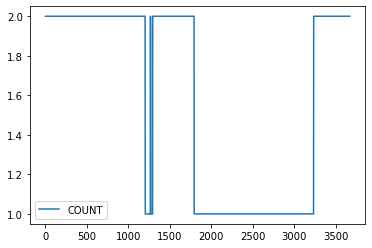

In [46]:
df.plot(y = 'COUNT')